In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import math
import pprint
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('JPM_sent_news.csv')

In [3]:
data['date']= data['publication_date']
#data['date']= pd.to_datetime(data.publication_date,format='%Y-%m-%d')
#data =data.set_index['date']
#data = date.drop(['publication_date'], axis=1)

In [4]:
data['date']= pd.to_datetime(data.publication_date,format='%Y-%m-%d')

In [5]:
data = data.set_index('date')

In [6]:
data = data.drop(['publication_date'], axis=1)

In [7]:
data[:100]

,compound,headline,neg,neu,pos,label
date,,,,,,
2015-07-21 19:12:17,0.2960,Citi ordered to pay $770 million over credit c...,0.117,0.667,0.217,1
2015-08-14 17:16:07,-0.3182,BNP Paribas to pay $115 mln to settle currency...,0.268,0.732,0.000,-1
2015-09-17 22:39:02,0.0000,Wall Street banks eye December for Fed liftoff...,0.000,1.000,0.000,0
2015-10-05 16:43:23,-0.1779,Global business growth at weakest pace this ye...,0.221,0.604,0.174,-1
2015-10-13 14:09:06,0.0000,Barclays set to name former JPMorgan banker St...,0.000,1.000,0.000,0
2015-10-14 00:17:23,0.2732,JPMorgan goes on a diet to appease regulators,0.000,0.741,0.259,1
2015-10-15 18:19:27,0.1027,Goldman profit plunges as market turmoil hits ...,0.202,0.565,0.234,1
2015-12-02 22:37:26,0.1280,Exclusive: Barclays' boss wants Blythe Masters...,0.000,0.870,0.130,1
2015-12-28 21:14:43,0.0000,JPMorgan to raise deposit rates for some big c...,0.000,1.000,0.000,0


In [8]:
news_daily = data.resample('D').mean()

In [9]:
# Resample the full dataframe to monthly timeframe
#news_daily = data.resample('D').mean()



In [10]:
news_daily.fillna(0, inplace=True)
news_daily.head()

,compound,neg,neu,pos,label
date,,,,,
2015-07-21,0.296,0.117,0.667,0.217,1.0
2015-07-22,0.000,0.000,0.000,0.000,0.0
2015-07-23,0.000,0.000,0.000,0.000,0.0
2015-07-24,0.000,0.000,0.000,0.000,0.0
2015-07-25,0.000,0.000,0.000,0.000,0.0


In [11]:
news_daily=news_daily.loc['2016-07-01':'2019-07-01']
news_daily.head()

,compound,neg,neu,pos,label
date,,,,,
2016-07-01,0.7783,0.0,0.541,0.459,1.0
2016-07-02,0.0000,0.0,0.000,0.000,0.0
2016-07-03,0.0000,0.0,0.000,0.000,0.0
2016-07-04,0.0000,0.0,1.000,0.000,0.0
2016-07-05,0.0000,0.0,1.000,0.000,0.0


In [12]:
news_daily.describe()

,compound,neg,neu,pos,label
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,0.070449,0.038489,0.709395,0.082408,0.151286
std,0.144265,0.052439,0.330678,0.079515,0.316816
min,-0.743000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.754250,0.000000,0.000000
50%,0.050855,0.025539,0.843455,0.075640,0.111111
75%,0.120065,0.056277,0.896595,0.117271,0.266667
max,0.848100,0.558000,1.000000,0.714000,1.000000


### Fundamental Data

In [120]:
fund = pd.read_csv('JPM_Fund.csv')
fund.head()

,date,marketcap,pricetobook,pricetoearnings,dividendyield,earningsyield,nopat,freecashflow,roe,ebitdagrowth,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
0,01/07/2016,3.670000e+11,1.4334,14.7900,0.020655,0.067613,23958000000,38881000000,0.09707,0.011099,...,36165000000,2.470000e+12,2.210000e+12,3.330000e+11,23958000000,23958000000,-2.255500e+10,77000000,77000000,1.0578
1,04/07/2016,3.700000e+11,1.4451,14.9104,0.020488,0.067067,23958000000,38881000000,0.09707,0.011099,...,36165000000,2.470000e+12,2.210000e+12,3.330000e+11,23958000000,23958000000,-2.255500e+10,77000000,77000000,1.0578
2,05/07/2016,3.700000e+11,1.4451,14.9104,0.020488,0.067067,23958000000,38881000000,0.09707,0.011099,...,36165000000,2.470000e+12,2.210000e+12,3.330000e+11,23958000000,23958000000,-2.255500e+10,77000000,77000000,1.0578
3,06/07/2016,3.710000e+11,1.4462,14.9226,0.020472,0.067012,23958000000,38881000000,0.09707,0.011099,...,36165000000,2.470000e+12,2.210000e+12,3.330000e+11,23958000000,23958000000,-2.255500e+10,77000000,77000000,1.0578
4,07/07/2016,3.810000e+11,1.4865,15.3379,0.019917,0.065198,23958000000,38881000000,0.09707,0.011099,...,36165000000,2.470000e+12,2.210000e+12,3.330000e+11,23958000000,23958000000,-2.255500e+10,77000000,77000000,1.0578


In [121]:
fund['date']= pd.to_datetime(fund.date,format='%d/%m/%Y')

In [122]:
fund.index =fund['date']

In [123]:
fund=fund[::-1]

In [124]:
fund=fund.loc['2019-07-01':'2016-07-01']

In [125]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2019-07-01 to 2016-07-01
Data columns (total 32 columns):
date                              782 non-null datetime64[ns]
marketcap                         782 non-null float64
pricetobook                       782 non-null float64
pricetoearnings                   782 non-null float64
dividendyield                     782 non-null float64
earningsyield                     782 non-null float64
nopat                             782 non-null int64
freecashflow                      782 non-null int64
roe                               782 non-null float64
ebitdagrowth                      782 non-null float64
ebitdamargin                      782 non-null float64
cashdividendspershare             782 non-null float64
bookvaluepershare                 782 non-null float64
debttoequity                      782 non-null float64
epsgrowth                         782 non-null float64
investedcapitalgrowth             782 non-null f

### Price analysis

In [126]:
df_price = pd.read_csv('JPM_price.csv')

In [127]:
df_price['date']= df_price['date']
df_price['date']=pd.to_datetime(df_price.date,format='%Y-%m-%d')
df_price.index =df_price['date']

In [128]:
#df_price = df_price.drop(['date'], axis=1)

In [129]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,intraperiod,low,open,volume
date,,,,,,,,,,,,,,
2019-08-07,0,108.03,108.28,105.940,108.00,16523288.0,108.03,2019-08-07,daily,108.28,False,105.940,108.00,17320865.0
2019-08-06,1,110.43,110.50,108.340,110.05,10203487.0,110.43,2019-08-06,daily,110.50,False,108.340,110.05,10203487.0
2019-08-05,2,109.57,110.98,108.265,110.79,15855328.0,109.57,2019-08-05,daily,110.98,False,108.265,110.79,15855328.0
2019-08-02,3,112.93,113.43,111.400,112.40,11025527.0,112.93,2019-08-02,daily,113.43,False,111.400,112.40,11025527.0
2019-08-01,4,112.94,116.80,112.595,115.33,15664530.0,112.94,2019-08-01,daily,116.80,False,112.595,115.33,15664530.0


In [130]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1200 entries, 2019-08-07 to 2014-10-30
Data columns (total 14 columns):
Unnamed: 0     1200 non-null int64
adj_close      1200 non-null float64
adj_high       1200 non-null float64
adj_low        1200 non-null float64
adj_open       1200 non-null float64
adj_volume     1200 non-null float64
close          1200 non-null float64
date           1200 non-null datetime64[ns]
frequency      1200 non-null object
high           1200 non-null float64
intraperiod    1200 non-null bool
low            1200 non-null float64
open           1200 non-null float64
volume         1200 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(1), object(1)
memory usage: 132.4+ KB


In [131]:
import talib
for n in [14, 30, 50, 200]:

    # Create the moving average indicator and divide by Adj_Close
    df_price['ma' + str(n)] = talib.SMA(df_price['adj_close'].values,
                              timeperiod=n) / df_price['adj_close']
    # Create the RSI indicator
    df_price['rsi' + str(n)] = talib.RSI(df_price['adj_close'].values, timeperiod=n)

In [132]:
df_price=df_price.loc['2019-07-01':'2016-07-01']

In [133]:
df_price.ma200

date
2019-07-01         NaN
2019-06-28         NaN
2019-06-27         NaN
2019-06-26         NaN
2019-06-25         NaN
2019-06-24         NaN
2019-06-21         NaN
2019-06-20         NaN
2019-06-19         NaN
2019-06-18         NaN
2019-06-17         NaN
2019-06-14         NaN
2019-06-13         NaN
2019-06-12         NaN
2019-06-11         NaN
2019-06-10         NaN
2019-06-07         NaN
2019-06-06         NaN
2019-06-05         NaN
2019-06-04         NaN
2019-06-03         NaN
2019-05-31         NaN
2019-05-30         NaN
2019-05-29         NaN
2019-05-28         NaN
2019-05-24         NaN
2019-05-23         NaN
2019-05-22         NaN
2019-05-21         NaN
2019-05-20         NaN
                ...   
2016-08-12    1.241362
2016-08-11    1.237179
2016-08-10    1.238930
2016-08-09    1.226234
2016-08-08    1.220362
2016-08-05    1.215093
2016-08-04    1.246159
2016-08-03    1.242554
2016-08-02    1.260552
2016-08-01    1.255861
2016-07-29    1.250548
2016-07-28    1.246072
2016-0

In [134]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2019-07-01 to 2016-07-01
Data columns (total 22 columns):
Unnamed: 0     754 non-null int64
adj_close      754 non-null float64
adj_high       754 non-null float64
adj_low        754 non-null float64
adj_open       754 non-null float64
adj_volume     754 non-null float64
close          754 non-null float64
date           754 non-null datetime64[ns]
frequency      754 non-null object
high           754 non-null float64
intraperiod    754 non-null bool
low            754 non-null float64
open           754 non-null float64
volume         754 non-null float64
ma14           754 non-null float64
rsi14          754 non-null float64
ma30           751 non-null float64
rsi30          750 non-null float64
ma50           731 non-null float64
rsi50          730 non-null float64
ma200          581 non-null float64
rsi200         580 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(18), int64(1), object(1)
memory usage: 

In [135]:
#df.join(other, lsuffix='_caller', rsuffix='_other')
df_price = df_price.join(news_daily['compound'])
#full_df = pd.merge(df_price,news_daily['compound'],how='left')

In [136]:
df_price=pd.merge(df_price,fund,how='outer',on='date')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [137]:
df_price.index =df_price['date']

In [138]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
date,,,,,,,,,,,,,,,,,,,,,
2019-07-01,26.0,112.880844,113.714938,112.285062,112.434007,12762478.0,113.68,2019-07-01,daily,114.52,...,49367000000,2.740000e+12,2.480000e+12,3.620000e+11,32941000000,32941000000,-1.170000e+11,43004000000,43004000000,1.2125
2019-06-28,27.0,111.014060,111.639631,110.120387,110.259402,21634683.0,111.80,2019-06-28,daily,112.43,...,49367000000,2.740000e+12,2.480000e+12,3.620000e+11,32941000000,32941000000,-1.170000e+11,43004000000,43004000000,1.2381
2019-06-27,28.0,108.074868,108.779877,107.677680,108.074868,10906607.0,108.84,2019-06-27,daily,109.55,...,49367000000,2.740000e+12,2.480000e+12,3.620000e+11,32941000000,32941000000,-1.170000e+11,43004000000,43004000000,1.2381
2019-06-26,29.0,107.717399,108.541564,107.399649,107.538664,10324609.0,108.48,2019-06-26,daily,109.31,...,49367000000,2.740000e+12,2.480000e+12,3.620000e+11,32941000000,32941000000,-1.170000e+11,43004000000,43004000000,1.2381
2019-06-25,30.0,107.002460,108.213884,106.913093,107.915993,18660111.0,107.76,2019-06-25,daily,108.98,...,49367000000,2.740000e+12,2.480000e+12,3.620000e+11,32941000000,32941000000,-1.170000e+11,43004000000,43004000000,1.2381


In [139]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2019-07-01 to 2016-07-04
Data columns (total 54 columns):
Unnamed: 0                        754 non-null float64
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              782 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null object
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              754 non-null float64
rsi14                             754 non-null

In [140]:
df_price['Unnamed: 0'].drop

<bound method Series.drop of date
2019-07-01     26.0
2019-06-28     27.0
2019-06-27     28.0
2019-06-26     29.0
2019-06-25     30.0
2019-06-24     31.0
2019-06-21     32.0
2019-06-20     33.0
2019-06-19     34.0
2019-06-18     35.0
2019-06-17     36.0
2019-06-14     37.0
2019-06-13     38.0
2019-06-12     39.0
2019-06-11     40.0
2019-06-10     41.0
2019-06-07     42.0
2019-06-06     43.0
2019-06-05     44.0
2019-06-04     45.0
2019-06-03     46.0
2019-05-31     47.0
2019-05-30     48.0
2019-05-29     49.0
2019-05-28     50.0
2019-05-24     51.0
2019-05-23     52.0
2019-05-22     53.0
2019-05-21     54.0
2019-05-20     55.0
              ...  
2016-07-05    778.0
2016-07-01    779.0
2019-05-27      NaN
2019-04-19      NaN
2019-02-18      NaN
2019-01-21      NaN
2019-01-01      NaN
2018-12-25      NaN
2018-12-05      NaN
2018-11-22      NaN
2018-09-03      NaN
2018-07-04      NaN
2018-05-28      NaN
2018-03-30      NaN
2018-02-19      NaN
2018-01-15      NaN
2018-01-01      NaN
2017-1

In [141]:
df_pricey=df_price.loc['2016-07-01':'2019-07-01']

In [142]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2019-07-01 to 2016-07-04
Data columns (total 54 columns):
Unnamed: 0                        754 non-null float64
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              782 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null object
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              754 non-null float64
rsi14                             754 non-null

In [143]:
df_price['ebitda'] = df_price['ebitda'].astype(float)

In [144]:
df_price.columns

Index(['Unnamed: 0', 'adj_close', 'adj_high', 'adj_low', 'adj_open',
       'adj_volume', 'close', 'date', 'frequency', 'high', 'intraperiod',
       'low', 'open', 'volume', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50',
       'rsi50', 'ma200', 'rsi200', 'compound', 'marketcap', 'pricetobook',
       'pricetoearnings', 'dividendyield', 'earningsyield', 'nopat',
       'freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin',
       'cashdividendspershare', 'bookvaluepershare', 'debttoequity',
       'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth', 'finleverage',
       'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps', 'ebitda',
       'totalassets', 'totalliabilities', 'debt', 'netincome',
       'netcashfromoperatingactivities', 'netcashfrominvestingactivities',
       'netcashfromfinancingactivities', 'longterminvestments',
       'one_yr_monthly_beta'],
      dtype='object')

In [145]:
fundamentals=['marketcap', 'pricetobook','pricetoearnings', 'dividendyield', 'earningsyield', 'nopat','freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin',
       'cashdividendspershare', 'bookvaluepershare',
       'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
        'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments','one_yr_monthly_beta']

In [146]:
for column in fundamentals:
    df_price[column] = df_price[column].astype(float)

In [147]:
df_price=df_price[::-1]

In [148]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
date,,,,,,,,,,,,,,,,,,,,,
2016-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-04,NaN,NaN,...,3.616500e+10,2.470000e+12,2.210000e+12,3.330000e+11,2.395800e+10,2.395800e+10,-2.255500e+10,7.700000e+07,7.700000e+07,1.0578
2016-09-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-05,NaN,NaN,...,3.616500e+10,2.470000e+12,2.210000e+12,3.330000e+11,2.395800e+10,2.395800e+10,-2.255500e+10,7.700000e+07,7.700000e+07,1.1187
2016-11-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-24,NaN,NaN,...,3.853300e+10,2.520000e+12,2.270000e+12,3.460000e+11,2.344000e+10,2.344000e+10,-8.484400e+10,8.770100e+10,8.770100e+10,0.9415
2016-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-26,NaN,NaN,...,3.853300e+10,2.520000e+12,2.270000e+12,3.460000e+11,2.344000e+10,2.344000e+10,-8.484400e+10,8.770100e+10,8.770100e+10,1.4748
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-02,NaN,NaN,...,4.001400e+10,2.490000e+12,2.240000e+12,3.300000e+11,2.473300e+10,2.473300e+10,-8.920200e+10,9.827100e+10,9.827100e+10,1.5352


In [149]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2016-07-04 to 2019-07-01
Data columns (total 54 columns):
Unnamed: 0                        754 non-null float64
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              782 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null object
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              754 non-null float64
rsi14                             754 non-null

### EDA

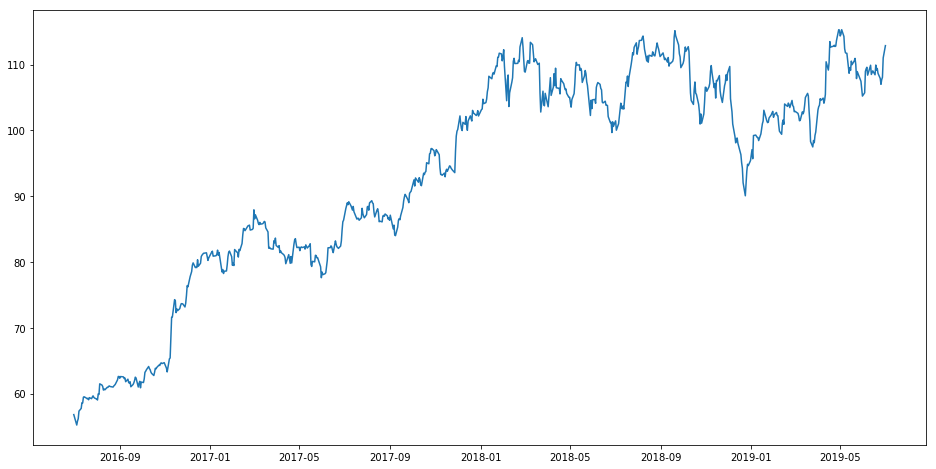

In [150]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df_price['adj_close'], label='Close Price history')

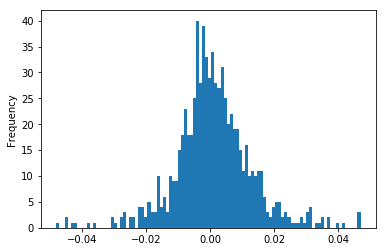

In [151]:
df_price['adj_close'].pct_change().plot.hist(bins=100)

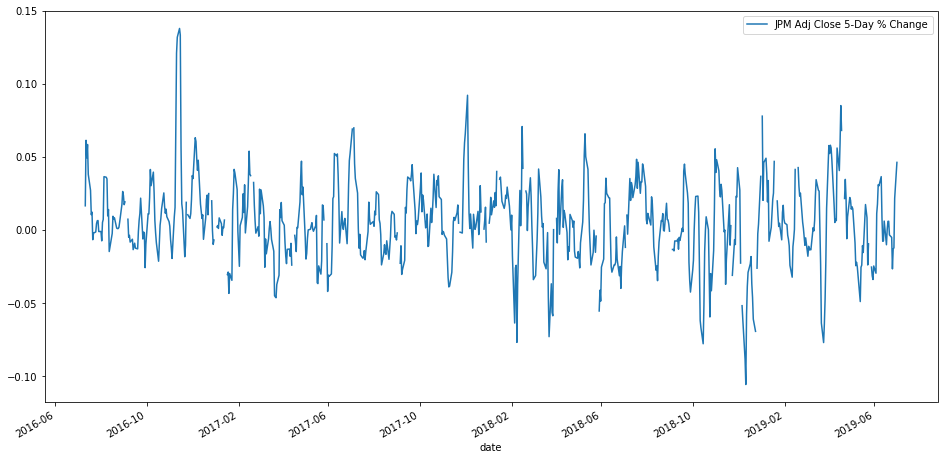

In [152]:
plt.figure(figsize=(16,8))
df_price['adj_close'].pct_change(5).plot(label='JPM Adj Close 5-Day % Change',legend=True)

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000            -0.079703
5d_close_future_pct     -0.079703             1.000000


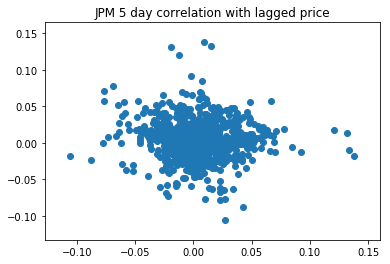

In [153]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_price['5d_future_close'] = df_price['adj_close'].shift(-5)
df_price['5d_close_future_pct'] = df_price['5d_future_close'].pct_change(5)
df_price['5d_close_pct'] = df_price['adj_close'].pct_change(5)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_price[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('JPM 5 day correlation with lagged price')
plt.scatter(df_price['5d_close_pct'], df_price['5d_close_future_pct'])
plt.show()

                     compound  5d_close_future_pct
compound             1.000000            -0.073096
5d_close_future_pct -0.073096             1.000000


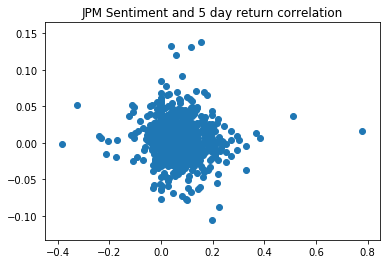

In [154]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_price[['compound', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('JPM Sentiment and 5 day return correlation')
plt.scatter(df_price['compound'], df_price['5d_close_future_pct'])
plt.show()

                     1d_close_pct  1d_close_future_pct
1d_close_pct             1.000000             0.012919
1d_close_future_pct      0.012919             1.000000


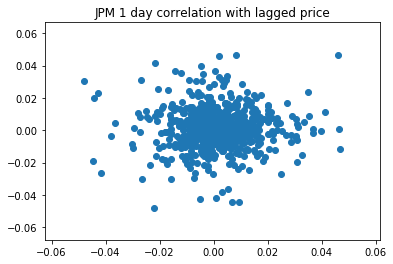

In [155]:
df_1 = df_price
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_1['1d_future_close'] = df_1['adj_close'].shift(-1)
df_1['1d_close_future_pct'] = df_1['1d_future_close'].pct_change(1)
df_1['1d_close_pct'] = df_1['adj_close'].pct_change(1)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_1[['1d_close_pct', '1d_close_future_pct']].corr()
print(corr)
# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('JPM 1 day correlation with lagged price')
plt.scatter(df_1['1d_close_pct'], df_1['1d_close_future_pct'])
plt.show()

                     compound  1d_close_future_pct
compound             1.000000            -0.083685
1d_close_future_pct -0.083685             1.000000


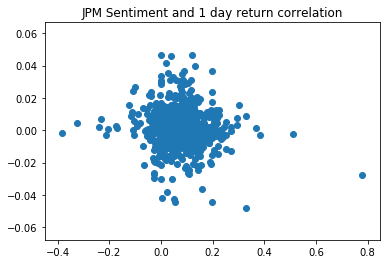

In [156]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_1[['compound', '1d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('JPM Sentiment and 1 day return correlation')
plt.scatter(df_1['compound'], df_1['1d_close_future_pct'])
plt.show()

                      30d_close_pct  30d_close_future_pct
30d_close_pct              1.000000             -0.065141
30d_close_future_pct      -0.065141              1.000000


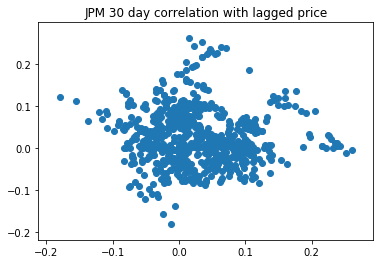

In [157]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_30 = df_price
df_30['30d_future_close'] = df_price['adj_close'].shift(-30)
df_30['30d_close_future_pct'] = df_price['30d_future_close'].pct_change(30)
df_30['30d_close_pct'] = df_price['adj_close'].pct_change(30)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_30[['30d_close_pct', '30d_close_future_pct']].corr()
print(corr)
# Scatter the current 30-day percent change vs the future 5-day percent change
plt.title('JPM 30 day correlation with lagged price')
plt.scatter(df_30['30d_close_pct'], df_30['30d_close_future_pct'])
plt.show()

                      compound  30d_close_future_pct
compound              1.000000             -0.069607
30d_close_future_pct -0.069607              1.000000


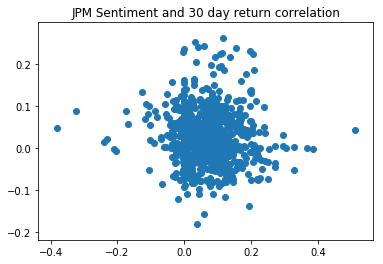

In [158]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_30[['compound', '30d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('JPM Sentiment and 30 day return correlation')
plt.scatter(df_30['compound'], df_30['30d_close_future_pct'])
plt.show()

In [159]:
df_price = df_price.drop(['Unnamed: 0'], axis =1)

In [160]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2016-07-04 to 2019-07-01
Data columns (total 62 columns):
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              782 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null object
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              754 non-null float64
rsi14                             754 non-null float64
ma30                              751 non-null

In [161]:
#df_price['MACD'] = pd.Series(talib.MACD(df_price['adj_close'], fastperiod=12, slowperiod=26, signalperiod=9))
#df_price['STOCH'] = pd.Series(talib.STOCH(df_price['adj_high'].values,df_price['adj_low'].values,df_price['adj_close'].values,fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0))

In [162]:
#df_price[:50]

#df_price.drop(['MACD','STOCH'], axis =1)

In [163]:
feature_names = ['5d_close_pct']  # a list of the feature names for later

# Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
for n in [14, 30, 50, 200]:

    # Create the moving average indicator and divide by Adj_Close
    df_price['ma' + str(n)] = talib.SMA(df_price['adj_close'].values,
                              timeperiod=n) / df_price['adj_close']
    # Create the RSI indicator
    df_price['rsi' + str(n)] = talib.RSI(df_price['adj_close'].values, timeperiod=n)
    
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

    

        

feature_names = feature_names + ['compound'] + fundamentals
print(feature_names)



['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200', 'compound', 'marketcap', 'pricetobook', 'pricetoearnings', 'dividendyield', 'earningsyield', 'nopat', 'freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin', 'cashdividendspershare', 'bookvaluepershare', 'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth', 'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps', 'ebitda', 'totalassets', 'totalliabilities', 'debt', 'netincome', 'netcashfromoperatingactivities', 'netcashfrominvestingactivities', 'netcashfromfinancingactivities', 'longterminvestments', 'one_yr_monthly_beta']


In [164]:
# Create 2 new volume features, 1-day % change and 5-day SMA of the % change
new_features = ['Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']
feature_names.extend(new_features)
df_price['Adj_Volume_1d_change'] = df_price['adj_volume'].pct_change()
df_price['Adj_Volume_1d_change_SMA'] = talib.SMA(df_price['Adj_Volume_1d_change'].values,
                                               timeperiod=5)


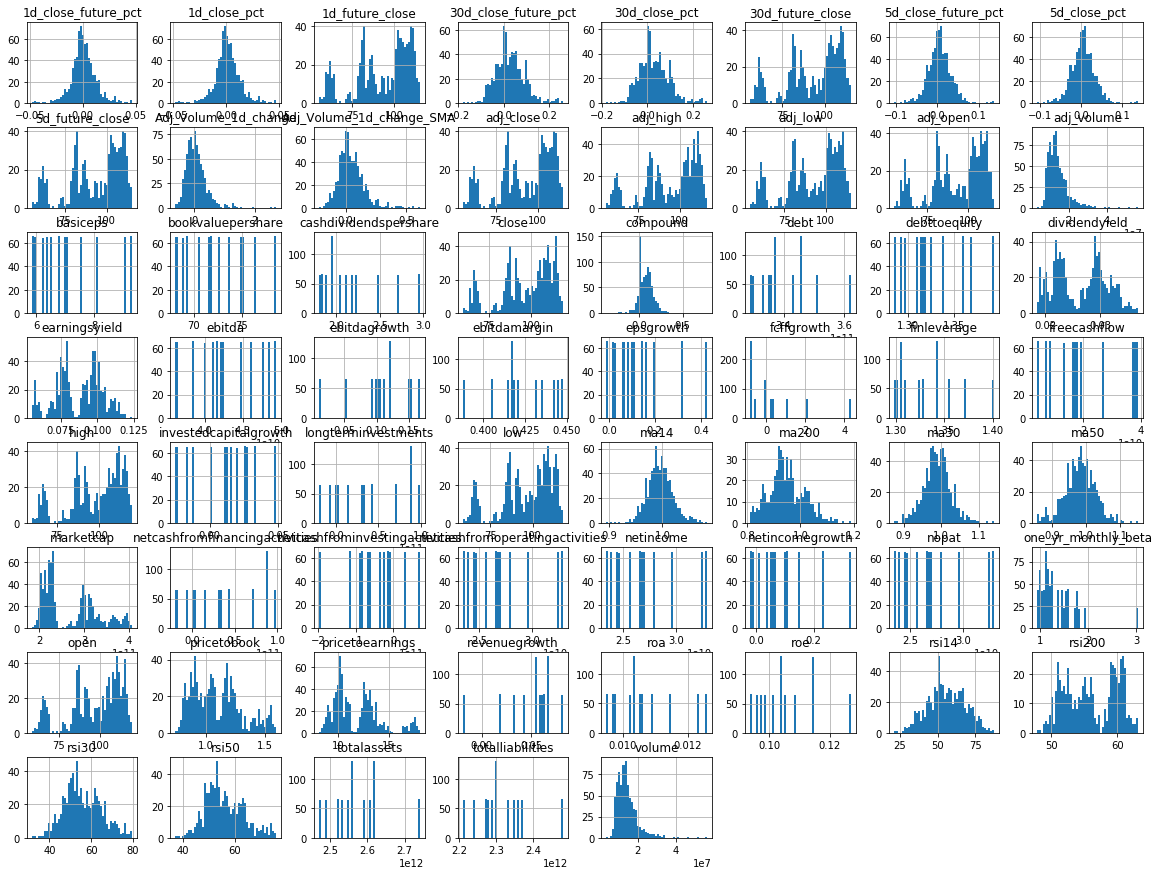

In [165]:
%matplotlib inline
import matplotlib.pyplot as plt
df_price.hist(bins=50, figsize=(20,15))
plt.show()

In [166]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2016-07-04 to 2019-07-01
Data columns (total 64 columns):
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              782 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null object
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              741 non-null float64
rsi14                             740 non-null float64
ma30                              725 non-null

In [167]:
df_price.columns

Index(['adj_close', 'adj_high', 'adj_low', 'adj_open', 'adj_volume', 'close',
       'date', 'frequency', 'high', 'intraperiod', 'low', 'open', 'volume',
       'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200',
       'compound', 'marketcap', 'pricetobook', 'pricetoearnings',
       'dividendyield', 'earningsyield', 'nopat', 'freecashflow', 'roe',
       'ebitdagrowth', 'ebitdamargin', 'cashdividendspershare',
       'bookvaluepershare', 'debttoequity', 'epsgrowth',
       'investedcapitalgrowth', 'fcffgrowth', 'finleverage', 'netincomegrowth',
       'roa', 'revenuegrowth', 'basiceps', 'ebitda', 'totalassets',
       'totalliabilities', 'debt', 'netincome',
       'netcashfromoperatingactivities', 'netcashfrominvestingactivities',
       'netcashfromfinancingactivities', 'longterminvestments',
       'one_yr_monthly_beta', '5d_future_close', '5d_close_future_pct',
       '5d_close_pct', '1d_future_close', '1d_close_future_pct',
       '1d_close_pct', '30d_future_cl

In [168]:
# Drop all na values
df_price = df_price.dropna()

# Create features and targets
# use feature_names for features; 5d_close_future_pct for targets
features = df_price[feature_names]
targets = df_price['5d_close_future_pct']

# Create DataFrame from target column and feature columns
feat_targ_df = df_price[['5d_close_future_pct'] + feature_names]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

                                5d_close_future_pct  5d_close_pct      ma14  \
5d_close_future_pct                        1.000000     -0.074888  0.077688   
5d_close_pct                              -0.074888      1.000000 -0.856142   
ma14                                       0.077688     -0.856142  1.000000   
rsi14                                     -0.147828      0.681864 -0.862959   
ma30                                       0.153891     -0.631329  0.846886   
rsi30                                     -0.138988      0.517323 -0.698942   
ma50                                       0.152534     -0.507677  0.702396   
rsi50                                     -0.120946      0.423233 -0.587169   
ma200                                      0.111099     -0.284212  0.404778   
rsi200                                    -0.031440      0.212483 -0.301320   
compound                                  -0.114834      0.162644 -0.141574   
marketcap                                  0.074699 

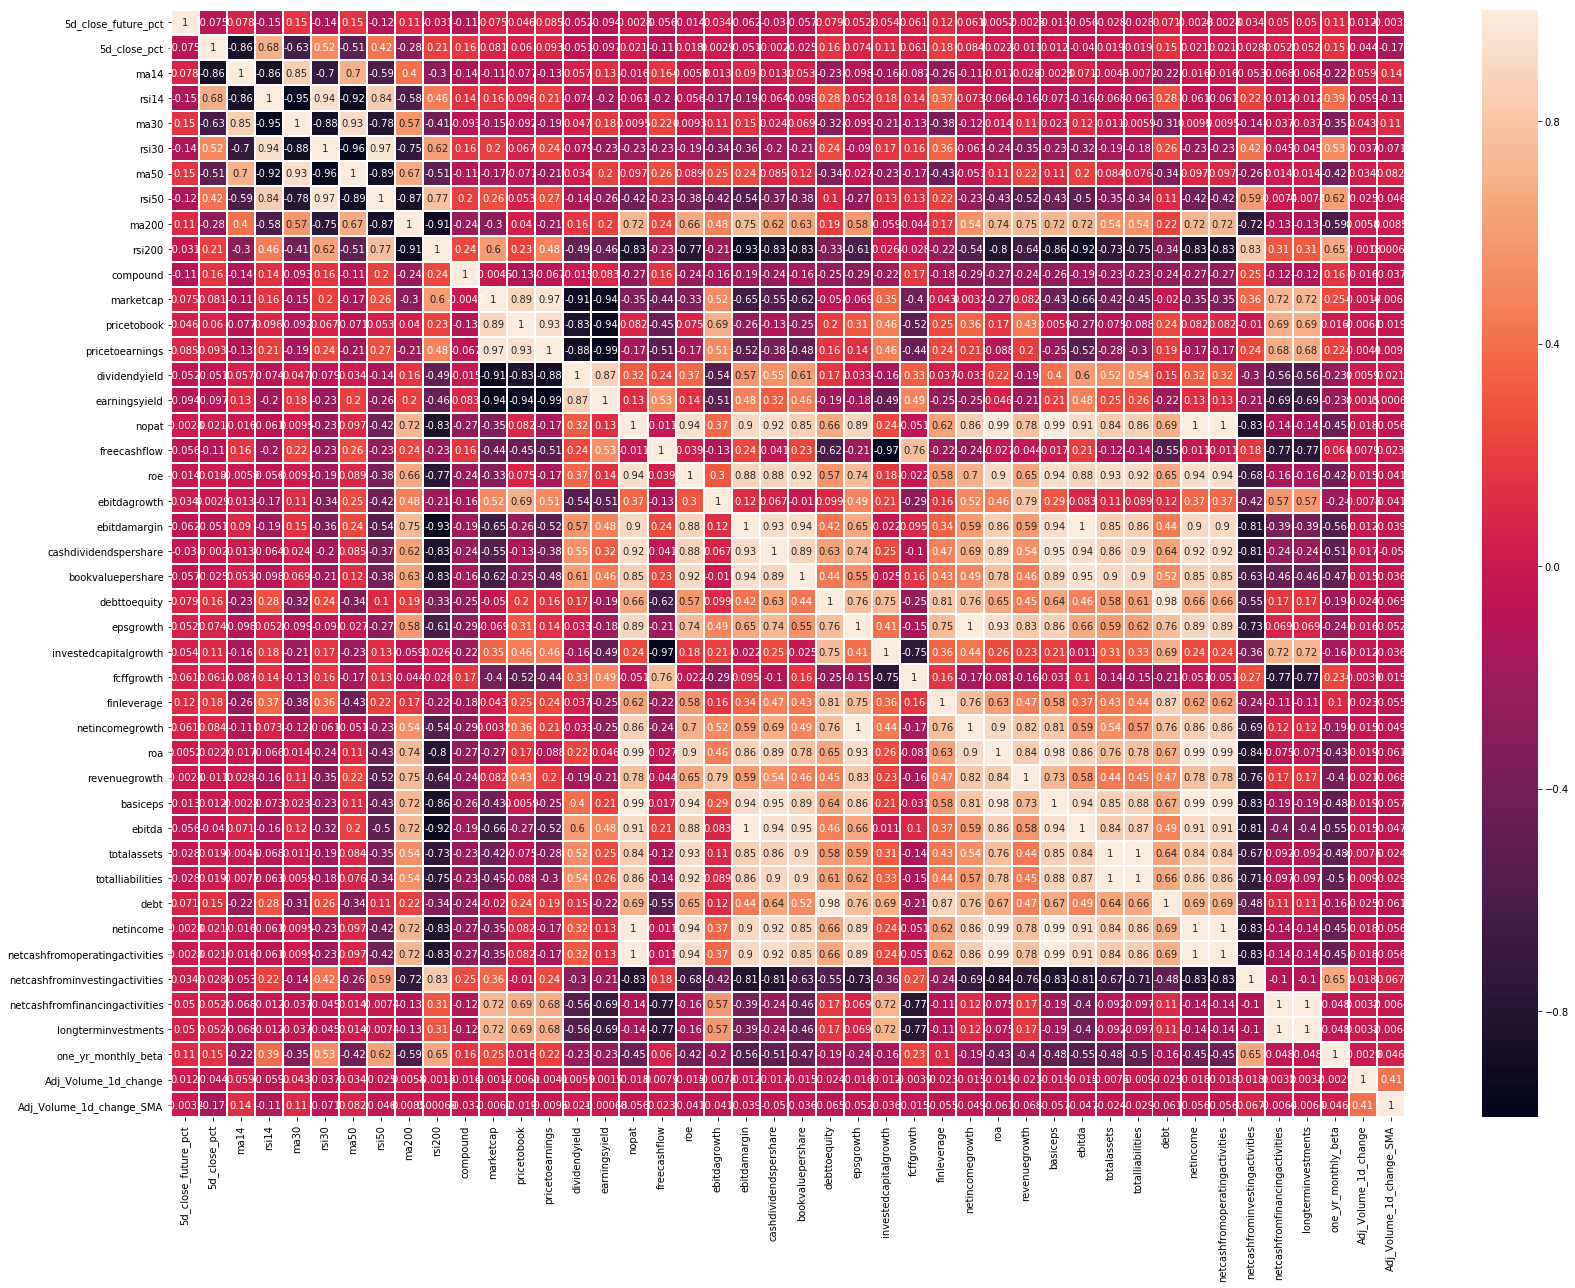

<Figure size 432x288 with 0 Axes>

In [169]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(24, 18))
sns.heatmap(corr, annot=True,linewidths=1)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()  # clear the plot area

# Create a scatter plot of the most highly correlated variable with the target
#plt.scatter(df_price['ma200'], df_price['5d_close_future_pct'])
#plt.show()

In [170]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = df_price.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.90)]

# Drop the features in the to_drop list
reduced_df = df_price.drop(to_drop, axis=1)

print("The reduced_df dataframe has {} columns".format(reduced_df.shape[1]))

The reduced_df dataframe has 32 columns


In [171]:
reduced_df.columns

Index(['date', 'frequency', 'intraperiod', 'volume', 'ma14', 'ma50', 'rsi50',
       'compound', 'dividendyield', 'earningsyield', 'ebitdagrowth',
       'investedcapitalgrowth', 'fcffgrowth', 'finleverage', 'netincomegrowth',
       'revenuegrowth', 'totalliabilities', 'debt',
       'netcashfromoperatingactivities', 'netcashfrominvestingactivities',
       'longterminvestments', 'one_yr_monthly_beta', '5d_close_future_pct',
       '5d_close_pct', '1d_future_close', '1d_close_future_pct',
       '1d_close_pct', '30d_future_close', '30d_close_future_pct',
       '30d_close_pct', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA'],
      dtype='object')

In [172]:
feature_names=['volume', 'ma14', 'rsi50', 'ma200',
       'rsi200', 'compound',
       'pricetobook', 'dividendyield', 'freecashflow', 'capex',
       'currentratio', 'debttoequity', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth',
       'operatingrevenue', 'netincome', 'netcashfromoperatingactivities',
       'netcashfromfinancingactivities', 'longterminvestments',
       'one_yr_monthly_beta',
       '5d_close_pct', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']

In [175]:
feature_names = ['compound',
       'marketcap', 'pricetobook', 'dividendyield', 'earningsyield',
       'ebitdamargin', 'cashdividendspershare', 'bookvaluepershare','debttoequity', 'fcffgrowth', 'finleverage',
       'revenuegrowth','ebitda', 'totalassets', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta', '5d_close_pct', 'ma14', 'ma30', 'ma50', 'rsi50',
       'ma200', 'rsi200', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']

In [176]:
#feature_names = ['5d_close_pct', 'ma14','ma50', 'rsi50', 'ma200', 'rsi200', 'compound', 'pricetobook', 'pricetoearnings', 'dividendyield', 'earningsyield']
#feature_names = ['compound']
features = df_price[feature_names]
targets = reduced_df['5d_close_future_pct']





In [177]:
targets.describe()

count    524.000000
mean       0.003262
std        0.028329
min       -0.105756
25%       -0.014170
50%        0.003889
75%        0.022061
max        0.092107
Name: 5d_close_future_pct, dtype: float64

In [178]:
# Import the statsmodels library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.80 * features.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:len(targets)]
test_targets = targets[train_size:len(targets)]
print(linear_features.shape, train_features.shape, test_features.shape)
print(linear_features.shape, train_features.shape, test_features.shape)

(524, 31) (419, 31) (105, 31)
(524, 31) (419, 31) (105, 31)


In [179]:
train_size

419

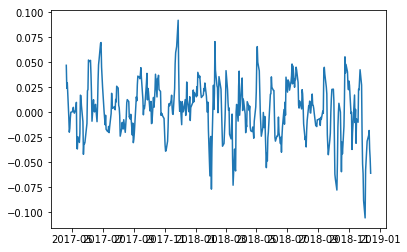

In [180]:
plt.plot(train_targets)

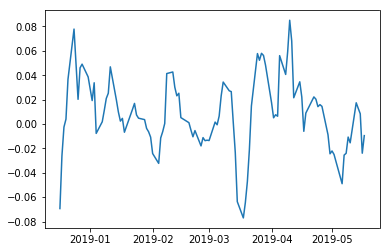

In [181]:
plt.plot(test_targets)

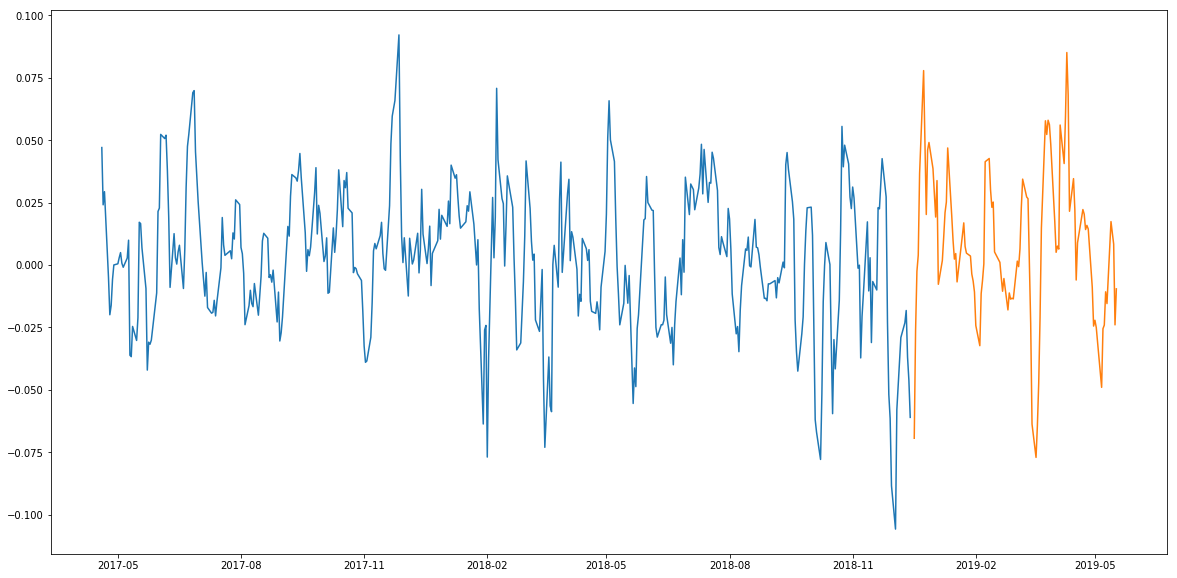

In [182]:
plt.figure(figsize=(20,10))
plt.plot(train_targets)
plt.plot(test_targets)
plt.show()

In [183]:
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features)
results = model.fit()  # fit the model
print(results.summary())

# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

                             OLS Regression Results                            
Dep. Variable:     5d_close_future_pct   R-squared:                       0.310
Model:                             OLS   Adj. R-squared:                  0.286
Method:                  Least Squares   F-statistic:                     12.96
Date:                 Mon, 26 Aug 2019   Prob (F-statistic):           2.80e-25
Time:                         16:23:15   Log-Likelihood:                 986.20
No. Observations:                  419   AIC:                            -1942.
Df Residuals:                      404   BIC:                            -1882.
Df Model:                           14                                         
Covariance Type:             nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
co

KeyboardInterrupt: 

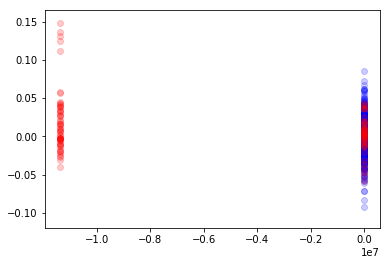

In [454]:
# Scatter the predictions vs the targets with 80% transparency
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha= 0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()

In [184]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
# scikit-learn:
lr = LinearRegression()
lr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(train_features)
test_predictions = lr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
#plt.scatter(train_targets, train_predictions, label='train')
#plt.scatter(test_targets, test_predictions, label='test')
#plt.legend()
#plt.show()

In [185]:
# Look at the R^2 scores on train and test
print(lr.score(train_features, train_targets))
print(lr.score(test_features, test_targets))

0.33377682953526766
-17.96061648768071


In [186]:
print(mean_squared_error(train_targets, train_predictions))
print(mean_squared_error(test_targets, test_predictions))


0.000510371396065198
0.017429075849050076


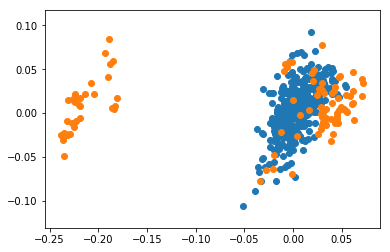

In [187]:
# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

In [188]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [189]:
scaler = StandardScaler()


scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.fit_transform(test_features)

print(linear_features.shape, scaled_train_features.shape, scaled_test_features.shape)
print(linear_features.shape, scaled_train_features.shape, scaled_test_features.shape)

(524, 31) (419, 31) (105, 31)
(524, 31) (419, 31) (105, 31)


In [190]:
# scikit-learn:
lr = LinearRegression()
lr.fit(scaled_train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(scaled_train_features)
test_predictions = lr.predict(scaled_test_features)

# Create a scatter plot with train and test actual vs predictions
#plt.scatter(train_targets, train_predictions, label='train')
#plt.scatter(test_targets, test_predictions, label='test')
#plt.legend()
#plt.show()b

In [191]:
# Look at the R^2 scores on train and test
print(lr.score(scaled_train_features, train_targets))
print(lr.score(scaled_test_features, test_targets))

0.33377770032815834
-7.220714455324163


In [192]:
print(mean_squared_error(train_targets, train_predictions))
print(mean_squared_error(test_targets, test_predictions))
rsme_train = np.sqrt(mean_squared_error(train_targets, train_predictions))
rsme_test = np.sqrt(mean_squared_error(test_targets, test_predictions))
print('Train Root mean squared error: ' + str(rsme_train))
print('Test Root mean squared error: ' + str(rsme_test))

0.0005103707289797483
0.007556687614472888
Train Root mean squared error: 0.02259138616773544
Test Root mean squared error: 0.08692921036379479


In [193]:
column =['Prediction']
test= pd.DataFrame(test_predictions,columns=column,index=test_targets.index)
#test

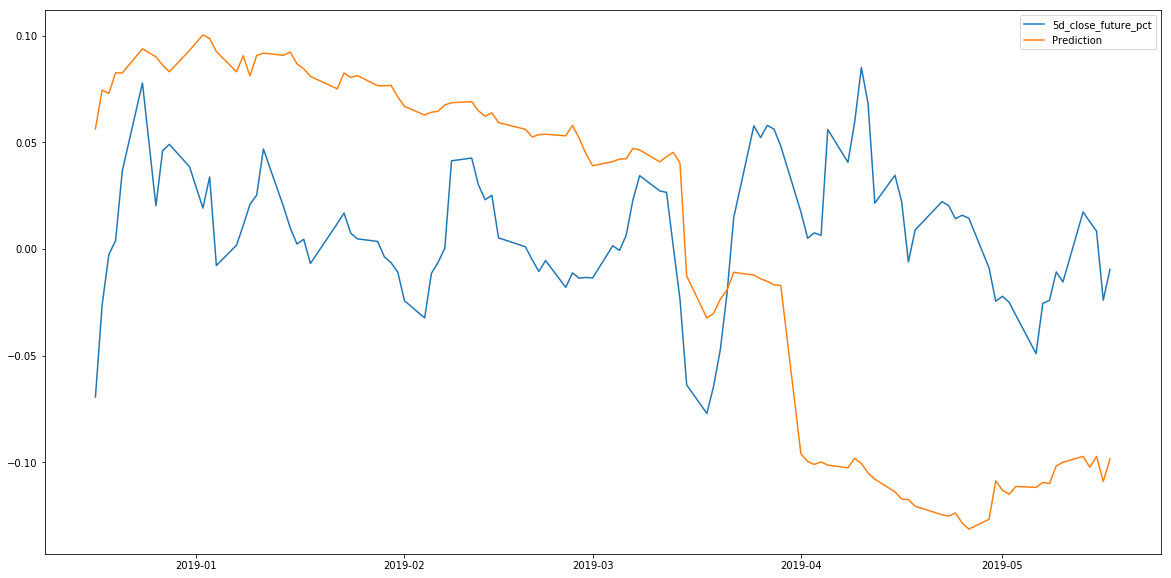

In [194]:
plt.figure(figsize=(20,10))
plt.plot(test_targets)
plt.plot(test)
plt.legend(['5d_close_future_pct','Prediction'])
plt.show()

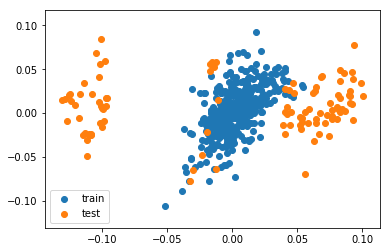

In [195]:
# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

### Lasso And Ridge - https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

In [196]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
scaler = StandardScaler()
# Fit the scaler on the training features and transform these in one go
scaled_train_features = scaler.fit_transform(train_features)

# Create the Lasso model 
la = Lasso()

# Fit it to the standardized training data
la.fit(scaled_train_features, train_targets)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [197]:
# Transform the test set with the pre-fitted scaler
scaled_test_features = scaler.transform(test_features)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(scaled_test_features, test_targets)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))

The model can predict -2.9% of the variance in the test set.
The model has ignored 31 out of 31 features.


In [198]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.01,normalize=True)

lassoReg.fit(train_features, train_targets)

pred = lassoReg.predict(test_features)
train_pred= lassoReg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
mse = mean_squared_error(test_targets, test_predictions)

print(train_score)
print(score)
print(mse)
print(np.sqrt(mse))

0.0
-0.02876045249621284
0.007556687614472888
0.08692921036379479


In [230]:
from sklearn.linear_model import Ridge

alphas = np.array([20,10,5,4,3,2,1.5,1,0.5,0.1,0.01,0.001,0.0001,0])
test_scores=[]
train_scores=[]

for n in alphas:
    ridgeReg = Ridge(alpha=n, normalize=True)
    ridgeReg.fit(train_features, train_targets)
    pred = ridgeReg.predict(test_features)
    train_pred= ridgeReg.predict(train_features)
    train_score = r2_score(train_targets, train_pred)
    train_scores.append(train_score)
    score = r2_score(test_targets, pred)
    test_scores.append(score)


ridge=pd.DataFrame(data=test_scores, index=alphas)

print(ridge)

                    0
20.0000 -7.643498e-02
10.0000 -1.169007e-01
5.0000  -1.881556e-01
4.0000  -2.213497e-01
3.0000  -2.743808e-01
2.0000  -3.734775e-01
1.5000  -4.643804e-01
1.0000  -6.247267e-01
0.5000  -9.813419e-01
0.1000  -2.001051e+00
0.0100  -4.105394e+00
0.0010  -8.738827e+00
0.0001  -1.083508e+01
0.0000  -1.183239e+21


In [199]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=0.5, normalize=True)

ridgeReg.fit(train_features, train_targets)

pred = ridgeReg.predict(test_features)
train_pred= ridgeReg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
mse = mean_squared_error(test_targets, test_predictions)

print('Train r2: ' + str(train_score))
print('Test r2: ' + str(score))
#print(mse)
#print(np.sqrt(mse))

Train r2: 0.18443738865892023
Test r2: -0.981341921144032


In [200]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=10, l1_ratio=1, normalize=False)

ENreg.fit(train_features,train_targets)

pred_cv = ENreg.predict(test_features)
train_pred= ENreg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
mse = mean_squared_error(test_targets, test_predictions)

print('Train r2: ' + str(train_score))
print('Test r2: ' + str(score))
#print(mse)
#print(np.sqrt(mse))

Train r2: 0.07596891168961384
Test r2: -0.981341921144032


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### PLS - https://www.idtools.com.au/partial-least-squares-regression-python/

In [201]:
#S basic codePython
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define PLS object
pls = PLSRegression(n_components=1)

# Fit
pls.fit(scaled_train_features, train_targets)

# Prediction
train_predicitions = pls.predict(scaled_train_features)
test_predicitions = pls.predict(scaled_test_features)

# Calculate scores
train_score = r2_score(train_targets,train_predictions)
score = r2_score(test_targets, test_predictions)
mse = mean_squared_error(test_targets, test_predictions)

print('Train r2: ' + str(train_score))
print('Test r2: ' + str(score))
print(mse)
print(np.sqrt(mse))


Train r2: 0.33377770032815834
Test r2: -7.220714455324163
0.007556687614472888
0.08692921036379479


In [202]:
from sys import stdout
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from scipy.signal import savgol_filter
 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score

In [203]:
X_calib = scaled_train_features
Y_calib = train_targets
X_valid = scaled_test_features
Y_valid = test_targets

def prediction(X_calib, Y_calib, X_valid, Y_valid, plot_components=False):
 
    #Run PLS including a variable number of components, up to 40,  and calculate MSE
    mse = []
    component = np.arange(1, 29)
    for i in component:
        pls = PLSRegression(n_components=i)
        # Fit
        pls.fit(train_features, Y_calib)
        # Prediction
        Y_pred = pls.predict(X_valid)
 
        mse_p = mean_squared_error(Y_valid, Y_pred)
        mse.append(mse_p)
 
        comp = 100*(i+1)/40
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
 
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")
 
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(xmin=-1)
 
        plt.show()
    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=msemin+1)
    pls.fit(train_features, Y_calib)
    Y_pred = pls.predict(X_valid) 
    
    # Calculate and print scores
    score_p = r2_score(Y_valid, Y_pred)
    mse_p = mean_squared_error(Y_valid, Y_pred)
    sep = np.std(Y_pred[:,0]-Y_valid)
    rpd = np.std(Y_valid)/sep
    bias = np.mean(Y_pred[:,0]-Y_valid)
    
    print('R2: %5.3f'  % score_p)
    print('MSE: %5.3f' % mse_p)
    print('SEP: %5.3f' % sep)
    print('RPD: %5.3f' % rpd)
    print('Bias: %5.3f' %  bias)
 
    # Plot regression and figures of merit
    rangey = max(Y_valid) - min(Y_valid)
    rangex = max(Y_pred) - min(Y_pred)
 
    z = np.polyfit(Y_valid, Y_pred, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(Y_pred, Y_valid, c='red', edgecolors='k')
        ax.plot(z[1]+z[0]*Y_valid, Y_valid, c='blue', linewidth=1)
        ax.plot(Y_valid, Y_valid, color='green', linewidth=1)
        plt.xlabel('Predicted')
        plt.ylabel('Measured')
        plt.title('Prediction')
 
        # Print the scores on the plot
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.1*rangey, 'R$^{2}=$ %5.3f'  % score_p)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.15*rangey, 'MSE: %5.3f' % mse_p)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.2*rangey, 'SEP: %5.3f' % sep)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.25*rangey, 'RPD: %5.3f' % rpd)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.3*rangey, 'Bias: %5.3f' %  bias)
        plt.show()

72% completed
Suggested number of components:  1

R2: -34.038
MSE: 0.032
SEP: 0.073
RPD: 0.417
Bias: -0.164


/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 21
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 21
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 21
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 21
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 21
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: 

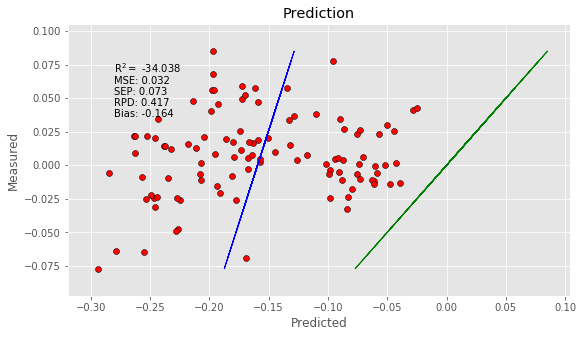

In [204]:
prediction(X_calib, Y_calib, X_valid, Y_valid, plot_components=False)

[ 40.67  59.51  72.61  79.94  84.45  88.5   91.49  93.51  95.4   97.09
  98.43  98.9   99.27  99.59  99.81  99.91  99.96  99.98  99.99 100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.  ]
0.16590030816656975
-0.38464516628688283
0.00127280068361251
0.0356763322612136


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


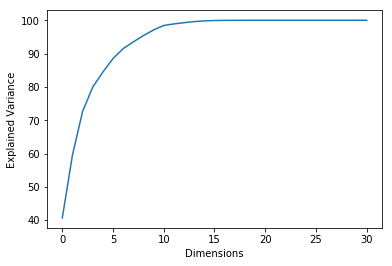

In [233]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

#convert it to numpy arrays
X=train_features
X_test=test_features

#Scaling the values
X = scale(X)
X_test=scale(X_test)

pca = PCA(n_components=31)

pca.fit(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_



#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)

plt.plot(var1)
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')

#Looking at above plot I'm taking 30 variables
pca = PCA(n_components=10)
pca.fit(X)
X1=pca.fit_transform(X)
X1_test=pca.fit_transform(X_test)

from sklearn import linear_model
regr = linear_model.LinearRegression() 

y = train_targets
regr.fit(X1,y)
pred=regr.predict(X1)
y_pred=regr.predict(X1_test)


train_score = r2_score(train_targets, pred)
score = r2_score(test_targets, y_pred)
mse = mean_squared_error(test_targets, y_pred)

print(train_score)
print(score)
print(mse)
print(np.sqrt(mse))

### Decision Tree

In [205]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(train_features, train_targets))
print(decision_tree.score(test_features, test_targets))

0.9999884307800704
-1.1314505240408632


In [206]:
#Scaled Data
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(scaled_train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(scaled_train_features, train_targets))
print(decision_tree.score(scaled_test_features, test_targets))

0.9999884307800704
-1.2443854293661807


In [207]:
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d,random_state=42)
    decision_tree.fit(train_features,train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(train_features, train_targets))
    print(decision_tree.score(test_features, test_targets), '\n')

max_depth= 3
0.2608133528382125
-0.45774242316000713 

max_depth= 5
0.46083346639667583
-0.46402807072363306 

max_depth= 10
0.9143596870879707
-0.6082497207519633 



In [208]:
#Scaled Data
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d,random_state=42)
    decision_tree.fit(train_features,train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(scaled_train_features, train_targets))
    print(decision_tree.score(scaled_test_features, test_targets), '\n')

max_depth= 3
-2.7789069283638446
-2.37595064174886 

max_depth= 5
-2.7321494728162112
-1.8858272839942392 

max_depth= 10
-2.277342661248428
-1.7679732189944624 



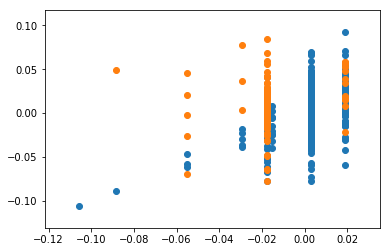

In [209]:
# Use the best max_depth of 3 from last exercise to fit a decision tree
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(train_features, train_targets)

# Predict values for train and test
train_predictions = decision_tree.predict(train_features)
test_predictions = decision_tree.predict(test_features)

# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

### Random Forest

In [210]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.9396545312534571
-0.11849512826675568


Usually, we can use sklearn's GridSearchCV() method to search hyperparameters, but with a financial time series, we don't want to do cross-validation due to data mixing. We want to fit our models on the oldest data and evaluate on the newest data. So we'll use sklearn's ParameterGrid to create combinations of hyperparameters to search.

In [211]:
from sklearn.model_selection import ParameterGrid

# Create a dictionary of hyperparameters to search
grid = {'n_estimators':[200], 'max_depth': [3], 'max_features': [4,8], 'random_state': [42]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_features, train_targets)
    test_scores.append(rfr.score(test_features, test_targets))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

-0.25795004267715127 {'random_state': 42, 'n_estimators': 200, 'max_features': 4, 'max_depth': 3}


In [212]:
rfr = RandomForestRegressor(n_estimators=200,max_features=4,max_depth=3,random_state=42)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.3285090672716471
-0.25795004267715127


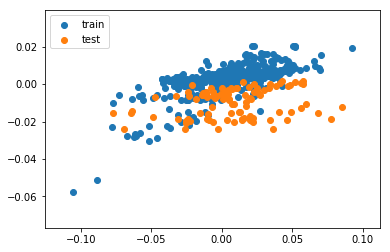

In [213]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
rfr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_targets, train_predictions, label='train')
plt.scatter(test_targets, test_predictions, label='test')
plt.legend()
plt.show()

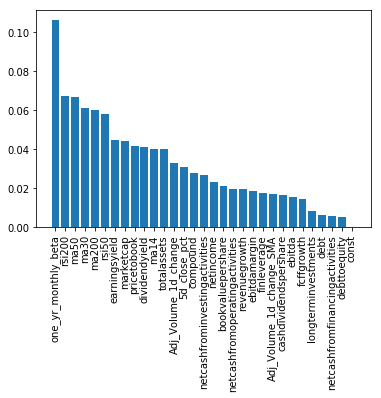

In [214]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))
#x = range(features.shape)
# Create tick labels 
#labels = np.array(feature_names)[sorted_index]
labels = [linear_features.columns[i] for i in sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical

plt.xticks(rotation=90)
plt.show()

In [215]:
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model -- hyperparameters have already been searched for you
gbr = GradientBoostingRegressor(max_features=3,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
gbr.fit(train_features,train_targets)

print(gbr.score(train_features, train_targets))
print(gbr.score(test_features,test_targets))

0.40858846434709345
-0.1145185336012995


In [216]:
# Sort feature importances in descending order
#indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
#names = [iris.feature_names[i] for i in indices]

# Create plot
#plt.figure()

# Create plot title
#plt.title("Feature Importance")

# Add bars
#plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
#plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
#plt.show()

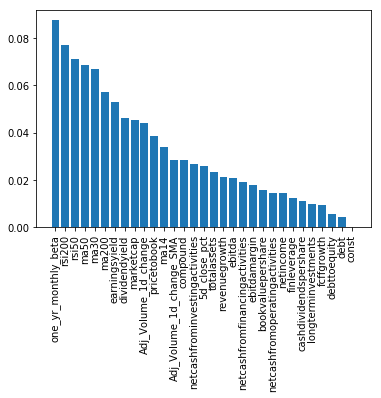

In [217]:
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x = range(len(feature_importances))

# Create tick labels 
#labels = np.array(feature_names)[sorted_index]
labels = [linear_features.columns[i] for i in sorted_index]
plt.bar(x, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

### K Nearest Neighbour

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


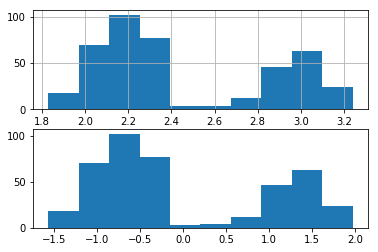

In [218]:


# Standardize the train and test features
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)

# Plot histograms of the 14-day SMA RSI before and after scaling
f, ax = plt.subplots(nrows=2, ncols=1)
train_features.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(scaled_train_features[:, 2])
plt.show()

In [219]:
from sklearn.neighbors import KNeighborsRegressor

for n in range(2, 20):
    # Create and fit the KNN model
    knn = KNeighborsRegressor(n_neighbors=n)
    
    # Fit the model to the training data
    knn.fit(scaled_train_features, train_targets)
    
    # Print number of neighbors and the score to find the best value of n
    print("n_neighbors =", n)
    print('train, test scores')
    print(knn.score(scaled_train_features, train_targets))
    print(knn.score(scaled_test_features, test_targets))
    print()  # prints a blank line

n_neighbors = 2
train, test scores
0.7874948667976154
-0.494606987097248

n_neighbors = 3
train, test scores
0.6759336943404741
-0.456582506223601

n_neighbors = 4
train, test scores
0.5765745424925219
-0.3254730198211393

n_neighbors = 5
train, test scores
0.5572813041384295
-0.31369290880957124

n_neighbors = 6
train, test scores
0.5110192038479259
-0.31416073482100004

n_neighbors = 7
train, test scores
0.453499245592828
-0.28739644742521775

n_neighbors = 8
train, test scores
0.4073585379480217
-0.31527817964051374

n_neighbors = 9
train, test scores
0.3870599172736473
-0.3232785987869391

n_neighbors = 10
train, test scores
0.35779808741418695
-0.327047568657729

n_neighbors = 11
train, test scores
0.34060864376108313
-0.30757678750463024

n_neighbors = 12
train, test scores
0.31780817088065627
-0.30538864439004887

n_neighbors = 13
train, test scores
0.2934694115582017
-0.3025140189292652

n_neighbors = 14
train, test scores
0.29071826268722334
-0.29187742261829785

n_neighbors =

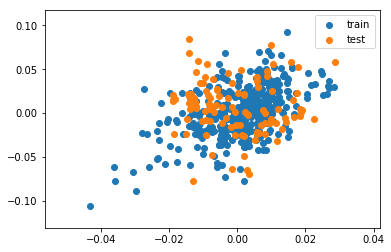

In [220]:
# Create the model with the best-performing n_neighbors of 5
knn = KNeighborsRegressor(n_neighbors=17)

# Fit the model
knn.fit(scaled_train_features, train_targets)

# Get predictions for train and test sets
train_predictions = knn.predict(scaled_train_features)
test_predictions = knn.predict(scaled_test_features)

# Plot the actual vs predicted values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

### Neural Network 

In [221]:
from keras.models import Sequential
from keras.layers import Dense

# Create the model
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))

# Fit the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=25)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/25
419/419 [==============================] - 0s 396us/step - loss: 0.1934
Epoch 2/25
419/419 [==============================] - 0s 39us/step - loss: 0.0351
Epoch 3/25
419/419 [==============================] - 0s 27us/step - loss: 0.0157
Epoch 4/25
419/419 [==============================] - 0s 24us/step - loss: 0.0100
Epoch 5/25
419/419 [==============================] - 0s 32us/step - loss: 0.0073
Epoch 6/25
419/419 [==============================] - 0s 27us/step - loss: 0.0055
Epoch 7/25
419/419 [==============================] - 0s 27us/step - loss: 0.0049
Epoch 8/25
419/419 [==============================] - 0s 30us/step - loss: 0.0040
Epoch 9/25
419/419 [==============================] - 0s 32us/step - loss: 0.0038
Epoch 10/25
419/419 [==============================] - 0s 24us/step - loss: 0.0033
Epoch 11/25
419/419 [==============================] - 0s 24us/step - loss: 0.0028
Epoch 12/25
419/419 [==============================] - 0s 30us/step - loss: 0.0027
Epoch 13/25


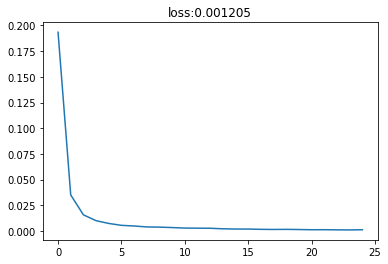

In [222]:
# Plot the losses from the fit
plt.plot(history.history['loss'])

# Use the last loss as the title
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

-0.22043226294976703
-194.6636445974632


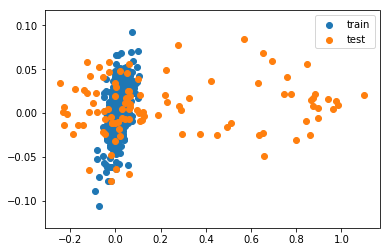

In [223]:
from sklearn.metrics import r2_score

# Calculate R^2 score
train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Plot predictions vs actual
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds,test_targets, label='test')
plt.legend()
plt.show()

In [224]:
import keras.losses
import tensorflow as tf

# Create loss function
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

keras.losses.sign_penalty = sign_penalty  # enable use of loss with keras
print(keras.losses.sign_penalty)

<function sign_penalty at 0x1c3c940268>


Epoch 1/25
419/419 [==============================] - 0s 423us/step - loss: 1.2528
Epoch 2/25
419/419 [==============================] - 0s 27us/step - loss: 0.3278
Epoch 3/25
419/419 [==============================] - 0s 23us/step - loss: 0.1579
Epoch 4/25
419/419 [==============================] - 0s 23us/step - loss: 0.1027
Epoch 5/25
419/419 [==============================] - 0s 24us/step - loss: 0.0929
Epoch 6/25
419/419 [==============================] - 0s 34us/step - loss: 0.0589
Epoch 7/25
419/419 [==============================] - 0s 25us/step - loss: 0.0535
Epoch 8/25
419/419 [==============================] - 0s 29us/step - loss: 0.0452
Epoch 9/25
419/419 [==============================] - 0s 24us/step - loss: 0.0334
Epoch 10/25
419/419 [==============================] - 0s 26us/step - loss: 0.0382
Epoch 11/25
419/419 [==============================] - 0s 34us/step - loss: 0.0367
Epoch 12/25
419/419 [==============================] - 0s 29us/step - loss: 0.0268
Epoch 13/25


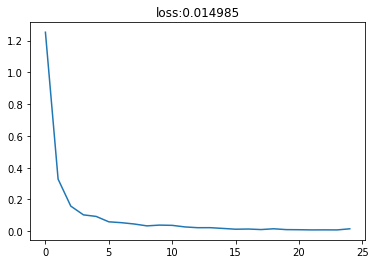

In [225]:
# Create the model
model_2 = Sequential()
model_2.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(1, activation='linear'))

# Fit the model with our custom 'sign_penalty' loss function
model_2.compile(optimizer='adam', loss=sign_penalty)
history = model_2.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

-1.4588782353231693
-158.5805222606585


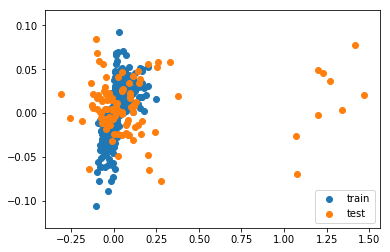

In [226]:
# Evaluate R^2 scores
train_preds = model_2.predict(scaled_train_features)
test_preds = model_2.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label= 'test')  # plot test set
plt.legend(); plt.show()

Epoch 1/25
419/419 [==============================] - 0s 505us/step - loss: 0.1166
Epoch 2/25
419/419 [==============================] - 0s 26us/step - loss: 0.0509
Epoch 3/25
419/419 [==============================] - 0s 24us/step - loss: 0.0258
Epoch 4/25
419/419 [==============================] - 0s 27us/step - loss: 0.0185
Epoch 5/25
419/419 [==============================] - 0s 38us/step - loss: 0.0145
Epoch 6/25
419/419 [==============================] - 0s 34us/step - loss: 0.0119
Epoch 7/25
419/419 [==============================] - 0s 26us/step - loss: 0.0102
Epoch 8/25
419/419 [==============================] - 0s 37us/step - loss: 0.0082
Epoch 9/25
419/419 [==============================] - 0s 32us/step - loss: 0.0093
Epoch 10/25
419/419 [==============================] - 0s 28us/step - loss: 0.0086
Epoch 11/25
419/419 [==============================] - 0s 31us/step - loss: 0.0065
Epoch 12/25
419/419 [==============================] - 0s 30us/step - loss: 0.0055
Epoch 13/25


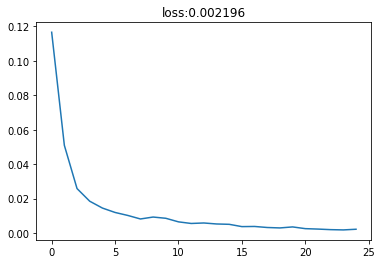

In [227]:
from keras.layers import Dropout

# Create model with dropout
model_3 = Sequential()
model_3.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='linear'))

# Fit model with mean squared error loss function
model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

In [228]:
# Make predictions from the 3 neural net models
train_pred1 = model_1.predict(scaled_train_features)
test_pred1 = model_1.predict(scaled_test_features)

train_pred2 = model_2.predict(scaled_train_features)
test_pred2 = model_2.predict(scaled_test_features)

train_pred3 = model_3.predict(scaled_train_features)
test_pred3 = model_3.predict(scaled_test_features)

# Horizontally stack predictions and take the average across rows
train_preds = np.mean(np.hstack((train_pred1, train_pred2, train_pred3)), axis=1)
test_preds = np.mean(np.hstack((test_pred1,test_pred2, test_pred3)), axis=1)
print(test_preds[-5:])

[0.11969162 0.08501837 0.12123387 0.06180614 0.08669975]


0.34652709131364257
-37.53286021069511


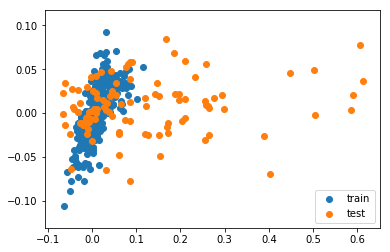

In [229]:
from sklearn.metrics import r2_score

# Evaluate the R^2 scores
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.legend(); plt.show()